Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading data

In [ ]:
df = pd.read_csv('Live.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

Performing EDA

In [ ]:
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])
df.info()

Stastistical Analysis

In [ ]:
df.describe()

Exploring Columns

In [ ]:
len(df['status_id'].unique())

In [ ]:
len(df['status_type'].unique())

Clustering based on status type

In [ ]:
df = df.drop(columns=['status_id', 'status_published'])
df.info()

Feature and target variables

In [ ]:
X = df
y = df['status_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [ ]:
X.info()

Feature Scaling

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

K-Means model with 2 cluster

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
kmeans.cluster_centers_

In [73]:
kmeans.inertia_

237.75726404419547

Checking Quality

In [74]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled" % (correct_labels, y.size))
print('Accuracy: {0:0.2f}'.  format(correct_labels/ float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled
Accuracy: 0.61


Elbow Method

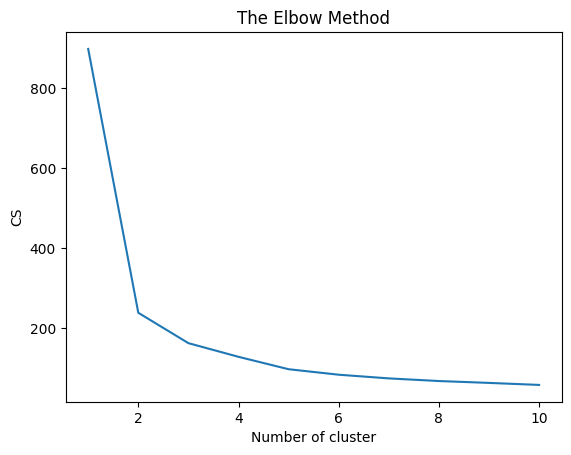

In [69]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('CS')
plt.show()

Now with 3 cluster

In [75]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [ ]:
kmeans.cluster_centers_

In [76]:
kmeans.inertia_

178.66340039279424

In [77]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled" % (correct_labels, y.size))
print('Accuracy: {0:0.2f}'.  format(correct_labels/ float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled
Accuracy: 0.58


4 Cluster

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

In [66]:
kmeans.inertia_

130.3338099042728

In [65]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled" % (correct_labels, y.size))
print('Accuracy: {0:0.2f}'.  format(correct_labels/ float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled
Accuracy: 0.58


In this project I have implemented KMeans clustering for unsupervised learning.

Applied for 2, 3, 4 cluters.

Accuracy :  
&emsp;   2 cluster - 61%  
&emsp;   3 cluster - 58%  
&emsp;   4 cluster - 58%

Inertia :  
&emsp;    2 cluster - 237.75  
&emsp;    3 cluster - 178.66  
&emsp;    4 cluster - 130.33  

This concludes that k = 2 is optimal number of cluster.

But k = 4 has least inertia among all.